    This is an exploratorion project about whatsapp chat analysis. I have exported a group chat instance without the media  in txt form to continue the analysis.

In [1]:
#installing libraries
!pip install numpy pandas matplotlib seaborn wordcloud emoji jovian --upgrade


Requirement already up-to-date: numpy in c:\users\nasik\anaconda3\lib\site-packages (1.19.2)
Requirement already up-to-date: pandas in c:\users\nasik\anaconda3\lib\site-packages (1.1.3)
Requirement already up-to-date: matplotlib in c:\users\nasik\anaconda3\lib\site-packages (3.3.2)
Requirement already up-to-date: seaborn in c:\users\nasik\anaconda3\lib\site-packages (0.11.0)
Requirement already up-to-date: wordcloud in c:\users\nasik\anaconda3\lib\site-packages (1.8.0)
Requirement already up-to-date: emoji in c:\users\nasik\anaconda3\lib\site-packages (0.6.0)
Requirement already up-to-date: jovian in c:\users\nasik\anaconda3\lib\site-packages (0.2.20)


In [2]:
#importing necessary libraries
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

<IPython.core.display.Javascript object>

In [3]:
#this fuction will take the txt file in file and key pair. Preprocessing codes and regular expressions are mentioned here
#NB: here I have defined encoding='latin-1' because I found encoding errors both without mentioning encoding method and also 
#by defining the standard utf8 encoding.
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file,'r', encoding='latin-1') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [4]:
#encoding='latin-1' works fine while importing. This solves the encoding problems that you might face
df = rawToDf('c.csv', '12hr')

In [5]:
df.shape

(4432, 3)

In [6]:
df

,date_time,user,msg
0,2020-09-12 20:08:00,grp_notif,Messages and calls are end-to-end encrypted. N...
1,2020-09-12 20:07:00,grp_notif,"+91 93707 88208 created group """"Ml Masters"""""" """
2,2020-09-12 20:08:00,grp_notif,"You joined using this group's invite link"" """
3,2020-09-12 20:08:00,grp_notif,+91 79790 46449 joined using this group's invi...
4,2020-09-12 20:08:00,grp_notif,+91 78932 17618 joined using this group's invi...
...,...,...,...
4427,2020-10-16 20:23:00,+91 93484 29088,"Of 1st image"" """
4428,2020-10-17 00:11:00,+91 98489 13183,@919885437843 bro if u have any queries relate...
4429,2020-10-17 00:12:00,+91 98489 13183,"It's for all "" Sorry if it hurts anyone """
4430,2020-10-17 00:13:00,+91 98205 01619,In CNN in convolution layer the kernel size sh...


In [7]:
df.dtypes

date_time    datetime64[ns]
user                 object
msg                  object
dtype: object

In [8]:
df.describe

<bound method NDFrame.describe of                date_time             user  \
0    2020-09-12 20:08:00        grp_notif   
1    2020-09-12 20:07:00        grp_notif   
2    2020-09-12 20:08:00        grp_notif   
3    2020-09-12 20:08:00        grp_notif   
4    2020-09-12 20:08:00        grp_notif   
...                  ...              ...   
4427 2020-10-16 20:23:00  +91 93484 29088   
4428 2020-10-17 00:11:00  +91 98489 13183   
4429 2020-10-17 00:12:00  +91 98489 13183   
4430 2020-10-17 00:13:00  +91 98205 01619   
4431 2020-10-17 00:32:00  +91 98821 90185   

                                                    msg  
0     Messages and calls are end-to-end encrypted. N...  
1       +91 93707 88208 created group ""Ml Masters""" "  
2          You joined using this group's invite link" "  
3     +91 79790 46449 joined using this group's invi...  
4     +91 78932 17618 joined using this group's invi...  
...                                                 ...  
4427               

In [10]:
#defining my user name in the chat
me = "Nasik Sami"


In [11]:
#getting the unique users
df["user"].unique()

array(['grp_notif', '+91 90514 15094', '+91 91128 66158',
       '+91 90995 37028', 'Nasik Sami', '+91 90283 51722',
       '+91 93707 88208', '+91 78932 17618', '+91 88890 29990',
       '+91 73389 99876', '+91 98858 15897', '+91 77967 02513',
       '+91 83559 84667', '+91 73966 05717', '+1 (512) 998-2438',
       '+91 79057 67778', '+91 86109 02042', '+91 79790 46449',
       '+91 70139 04382', '+91 81730 90964', '+91 88020 40148',
       '+91 77278 58500', '+91 99537 20991', '+91 99907 96993',
       '+91 89612 21281', '+91 98265 36683', '+91 91121 89508',
       '+91 89680 55931', '+91 86000 45606', '+91 85069 38506',
       '+91 70218 21421', '+91 96893 49300', '+91 96871 07111',
       '+91 79923 78732', '+91 98999 04060', '+91 88001 10345',
       '+91 94278 46144', '+91 93062 61819', '+91 98969 44479',
       '+91 70305 91513', '+91 6302 382 481', '+91 99751 30518',
       '+91 98821 90185', '+91 6364 597 569', '+91 97890 81105',
       '+91 81471 20321', '+91 99621 21499', '+

In [12]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(391, 3)

In [14]:
df.tail()


,date_time,user,msg
4427,2020-10-16 20:23:00,+91 93484 29088,"Of 1st image"" """
4428,2020-10-17 00:11:00,+91 98489 13183,@919885437843 bro if u have any queries relate...
4429,2020-10-17 00:12:00,+91 98489 13183,"It's for all "" Sorry if it hurts anyone """
4430,2020-10-17 00:13:00,+91 98205 01619,In CNN in convolution layer the kernel size sh...
4431,2020-10-17 00:32:00,+91 98821 90185,Send your resume to projyot.srivastava@capgemi...


In [15]:
df.reset_index(inplace=True, drop=True)
df.shape

(4432, 3)

In [16]:
#most active member in the group
df.groupby("user")["msg"].count().sort_values(ascending=False)

user
grp_notif          391
+91 98205 01619    352
+91 99537 20991    174
+91 77278 58500    154
+91 89680 55931    121
                  ... 
+91 91545 61194      1
+91 93215 86786      1
+91 96557 00445      1
+91 96891 42035      1
+91 88888 09972      1
Name: msg, Length: 190, dtype: int64

<AxesSubplot:ylabel='None'>

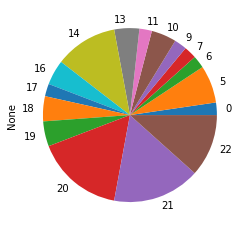

In [17]:
#What can my activity say about my sleep cycle?
df['hour'] = df['date_time'].apply(lambda x: x.hour)
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='pie')

<AxesSubplot:ylabel='hour'>

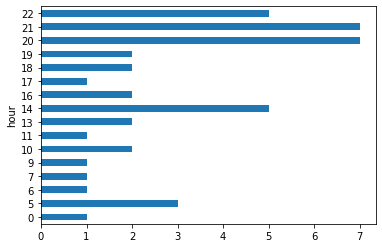

In [18]:
#What can my activity say about my sleep cycle?
df['hour'] = df['date_time'].apply(lambda x: x.hour)
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='barh')

In [19]:
"""
What is the difference in Weekend vs Weekday usage pattern?
How many words do I type on average on weekday vs weekend?
"""

'\nWhat is the difference in Weekend vs Weekday usage pattern?\nHow many words do I type on average on weekday vs weekend?\n'

In [20]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name())

In [21]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [24]:
msgs_per_user = df['user'].value_counts(sort=True)

msgs_per_user

grp_notif          391
+91 98205 01619    352
+91 99537 20991    174
+91 77278 58500    154
+91 89680 55931    121
                  ... 
+91 78930 17255      1
+91 88064 00585      1
+91 96891 42035      1
+91 90514 15094      1
+91 80876 21200      1
Name: user, Length: 190, dtype: int64

In [25]:
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['grp_notif',
 '+91 98205 01619',
 '+91 99537 20991',
 '+91 77278 58500',
 '+91 89680 55931']

In [26]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,msg,hour,weekday,is_weekend
0,2020-09-12 20:08:00,grp_notif,Messages and calls are end-to-end encrypted. N...,20,Saturday,True
1,2020-09-12 20:07:00,grp_notif,"+91 93707 88208 created group """"Ml Masters"""""" """,20,Saturday,True
2,2020-09-12 20:08:00,grp_notif,"You joined using this group's invite link"" """,20,Saturday,True
3,2020-09-12 20:08:00,grp_notif,+91 79790 46449 joined using this group's invi...,20,Saturday,True
4,2020-09-12 20:08:00,grp_notif,+91 78932 17618 joined using this group's invi...,20,Saturday,True


<AxesSubplot:xlabel='user', ylabel='count'>

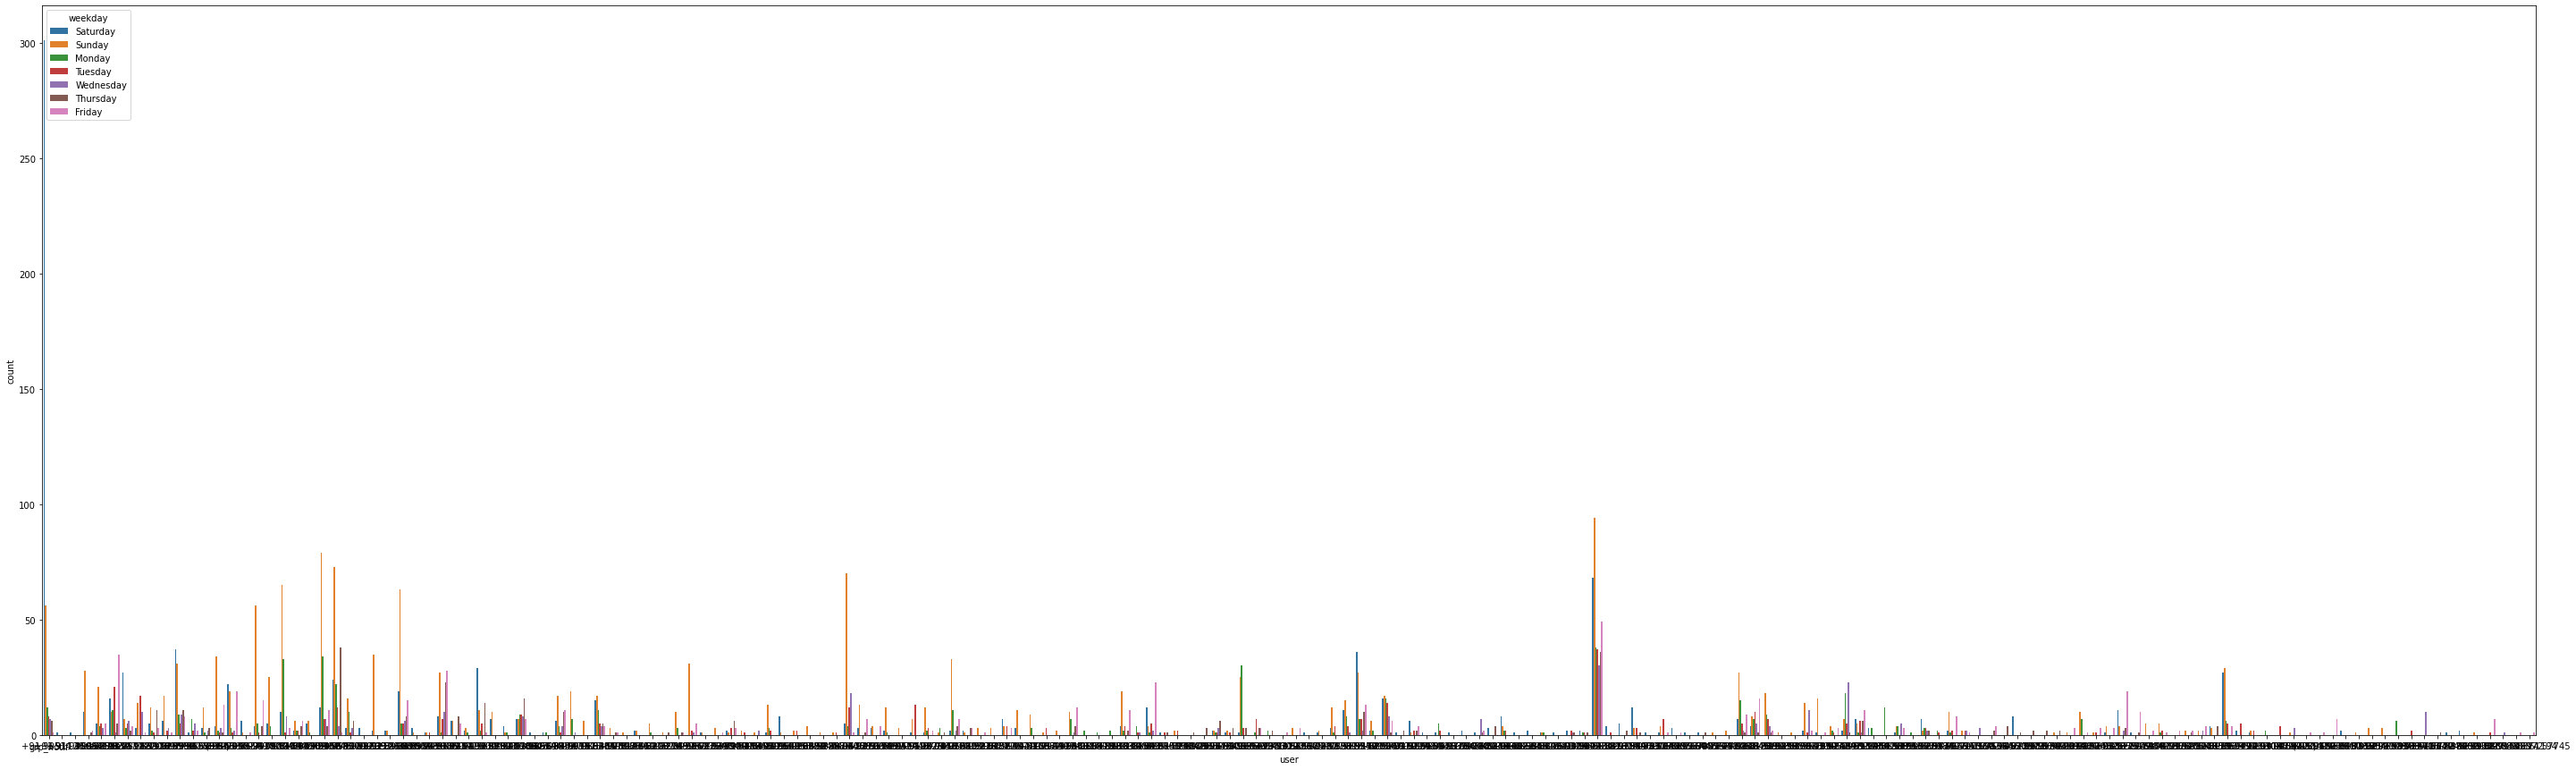

In [31]:
plt.figure(figsize=(50,15))
sns.countplot(x="user", hue="weekday", data=df)

In [32]:
df_top5['is_weekend'] = df_top5.weekday.isin(['Sunday', 'Saturday'])

<AxesSubplot:xlabel='user', ylabel='count'>

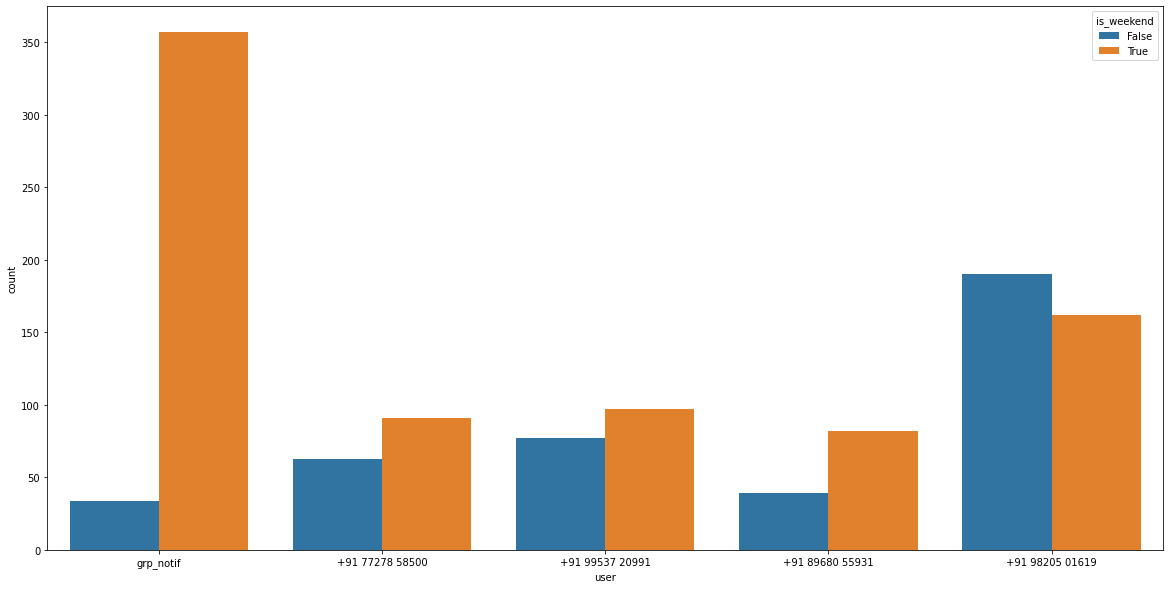

In [33]:
#number of text by user comparision in terms of weekdays and weekend activities
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top5)

In [34]:
def word_count(val):
    return len(val.split())

In [35]:
df['no_of_words'] = df['msg'].apply(word_count)

In [36]:
df_top5['no_of_words'] = df_top5['msg'].apply(word_count)

In [37]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

16857

In [38]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

20885

In [39]:
total_words_weekday/5 # average words on a weekday

3371.4

In [40]:
total_words_weekend/2 # average words on a weekend

10442.5

In [41]:
df.groupby('user')['no_of_words'].sum().sort_values(ascending=False)

user
grp_notif          3650
+91 98205 01619    3617
+91 98858 15897    1970
+91 99537 20991    1460
+91 70139 04382    1429
                   ... 
+91 91545 61194       2
+91 90664 37662       2
+91 88077 05593       2
+91 88064 00585       2
+91 93215 86786       2
Name: no_of_words, Length: 190, dtype: int64

In [42]:
(df_top5.groupby('user')['no_of_words'].sum()/df_top5.groupby('user').size()).sort_values(ascending=False)

user
+91 98205 01619    10.275568
grp_notif           9.335038
+91 99537 20991     8.390805
+91 77278 58500     6.889610
+91 89680 55931     5.826446
dtype: float64

In [44]:
wordPerMsg_weekday_vs_weekend = (df_top5.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df_top5.groupby(['user', 'is_weekend']).size())
wordPerMsg_weekday_vs_weekend

user             is_weekend
+91 77278 58500  False          7.761905
                 True           6.285714
+91 89680 55931  False          6.076923
                 True           5.707317
+91 98205 01619  False         10.515789
                 True           9.993827
+91 99537 20991  False          9.298701
                 True           7.670103
grp_notif        False          7.647059
                 True           9.495798
dtype: float64

<AxesSubplot:ylabel='user,is_weekend'>

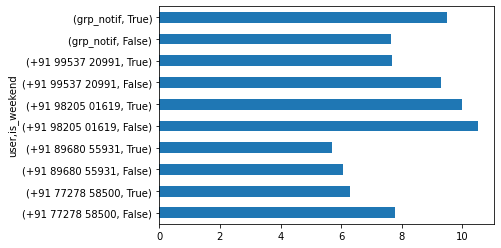

In [45]:
wordPerMsg_weekday_vs_weekend.plot(kind='barh')

In [47]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index() #number of messeges by hours in the week
x2 = x.pivot("hour", 'weekday', 'msg')
x2

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,17.0,37.0,29.0,199.0,11.0,15.0,29.0
1,126.0,21.0,35.0,99.0,3.0,23.0,18.0
2,67.0,7.0,16.0,40.0,16.0,3.0,13.0
3,5.0,26.0,21.0,38.0,3.0,6.0,6.0
4,NaN,1.0,2.0,1.0,1.0,NaN,11.0
5,NaN,3.0,NaN,3.0,NaN,3.0,NaN
6,2.0,2.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,1.0,3.0,NaN
8,1.0,NaN,NaN,1.0,NaN,NaN,NaN


<AxesSubplot:xlabel='weekday', ylabel='hour'>

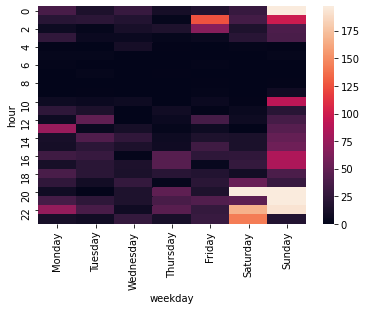

In [50]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

In [54]:
prev_msgs_index = my_msgs_index - 1 #my messeges with index no in the dataframe
print(prev_msgs_index, prev_msgs_index.shape)

[ 139  149  155  739  867 1883 1981 1982 2266 2270 2274 2275 2631 2632
 2634 2635 2640 3220 3225 3441 3697 3712 3714 3725 3896 3907 3965 4069
 4115 4116 4119 4121 4122 4130 4131 4132 4138 4181 4224 4227 4228 4229
 4327] (43,)


In [55]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(43, 7)

<AxesSubplot:ylabel='user'>

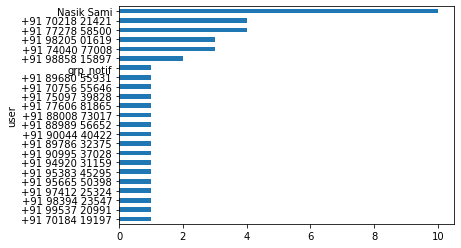

In [62]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')

In [57]:
comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

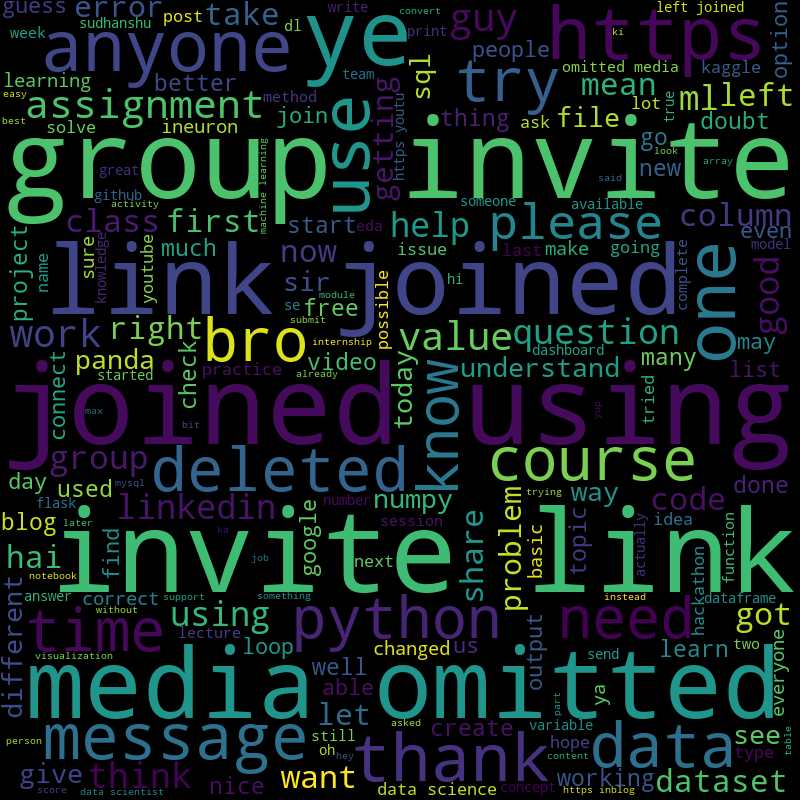

In [59]:
wordcloud.to_image()

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm_notebook
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
#from profanity_check import predict, predict_prob
import warnings
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from textblob import TextBlob
import emoji
import itertools 
import matplotlib.style as style
#from google.colab import files
style.use('ggplot')
warnings.filterwarnings('ignore')

{'grp_notif': '#F94144',
 '+91 90514 15094': '#F3722C',
 '+91 91128 66158': '#F8961E',
 '+91 90995 37028': '#F9C74F',
 'Nasik Sami': '#90BE6D',
 '+91 90283 51722': '#43AA8B',
 '+91 93707 88208': '#577590',
 '+91 78932 17618': '#6D597A'}

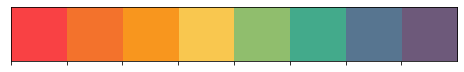

In [63]:

def get_colors_of_certain_order(names_in_certain_order):
  order = list(names_in_certain_order)
  return_list = []
  for name in order:
    return_list.append(color_dict[name])
  return return_list

color_dict = {}
colors = ['#F94144', '#F3722C', '#F8961E', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A']
sns.palplot(colors)
names = df['user'].unique()

for name, color in zip(names, colors):
  color_dict[name] = color

color_dict

In [65]:
df[df['user'] == '+91 91128 66158']

,date_time,user,msg,hour,weekday,is_weekend,no_of_words
138,2020-09-12 22:09:00,+91 91128 66158,Yes..worked..without iloc and np too it gives ...,22,Saturday,True,9


In [66]:
df[df['user'] == 'Nasik Sami'].sort_values(by = 'msg', ascending = False).iloc[4]

date_time                                    2020-09-27 14:32:00
user                                                  Nasik Sami
msg            yeah by a and b you are assigning the allocate...
hour                                                          14
weekday                                                   Sunday
is_weekend                                                  True
no_of_words                                                   18
Name: 2636, dtype: object

In [67]:
#all messeges by me
df[df['user'] == 'Nasik Sami'].sort_values(by = 'msg', ascending = False)

,date_time,user,msg,hour,weekday,is_weekend,no_of_words
4132,2020-10-11 21:04:00,Nasik Sami,you can follow krish's video only 7 video play...,21,Sunday,True,10
2641,2020-09-27 14:33:00,Nasik Sami,"yes"" """,14,Sunday,True,2
4120,2020-10-11 20:57:00,Nasik Sami,"yes he isn?t getting comfortable yet"" """,20,Sunday,True,7
4070,2020-10-11 19:23:00,Nasik Sami,yes and first finish this one and if you are a...,19,Sunday,True,56
2636,2020-09-27 14:32:00,Nasik Sami,yeah by a and b you are assigning the allocate...,14,Sunday,True,18
4225,2020-10-11 22:14:00,Nasik Sami,will try to finish these two before next class...,22,Sunday,True,11
868,2020-09-14 18:59:00,Nasik Sami,"this waa fun ??"" """,18,Monday,False,5
4116,2020-10-11 20:56:00,Nasik Sami,"this isn't a doubt clearing session ??"" """,20,Sunday,True,8
2633,2020-09-27 14:30:00,Nasik Sami,"so 1&3=i2 "" 2&4=i8 """,14,Sunday,True,5
4139,2020-10-11 21:12:00,Nasik Sami,"similar to reading out slides"" """,21,Sunday,True,6


In [70]:
df = df.sort_values(by = 'date_time')
print(df.shape)
df.head()

(4432, 7)


,date_time,user,msg,hour,weekday,is_weekend,no_of_words
1,2020-09-12 20:07:00,grp_notif,"+91 93707 88208 created group """"Ml Masters"""""" """,20,Saturday,True,8
0,2020-09-12 20:08:00,grp_notif,Messages and calls are end-to-end encrypted. N...,20,Saturday,True,26
15,2020-09-12 20:08:00,grp_notif,+91 90609 59777 joined using this group's invi...,20,Saturday,True,10
14,2020-09-12 20:08:00,grp_notif,+91 81730 90964 joined using this group's invi...,20,Saturday,True,10
13,2020-09-12 20:08:00,grp_notif,+48 794 123 314 joined using this group's invi...,20,Saturday,True,11


Text(0.5, 1.0, 'Messages sent per day over a time period')

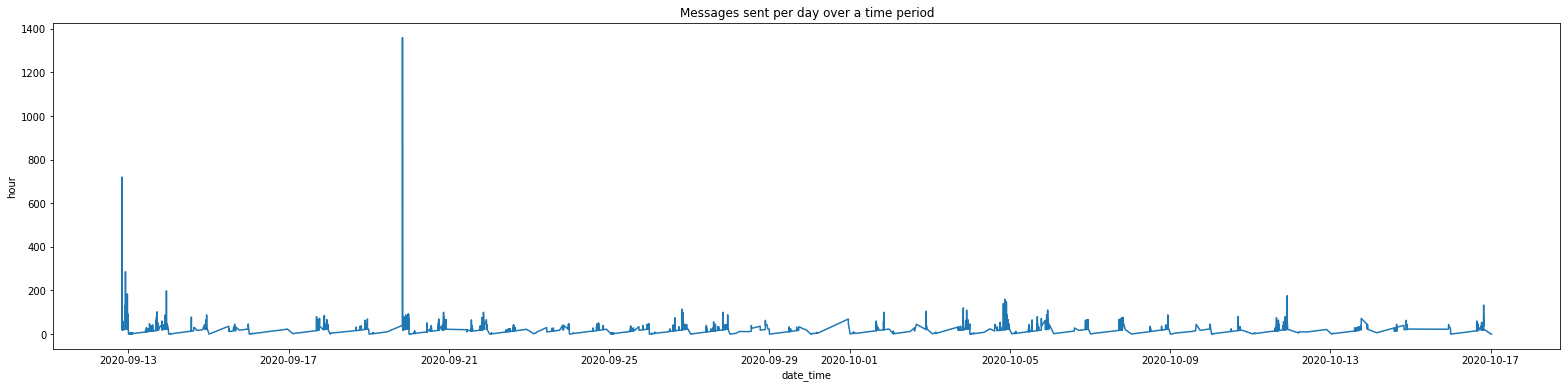

In [71]:
grouped_by_date = df.groupby('date_time').sum().reset_index()

plt.figure(figsize = (27, 6))
sns.lineplot(x = 'date_time', y = 'hour', data = grouped_by_date)
plt.title('Messages sent per day over a time period')

#plt.savefig('lineplot_full.svg', format = 'svg')
#files.download('lineplot_full.svg')

In [73]:

word_dict = dict.fromkeys(df['user'].unique())
for key in word_dict.keys():
  word_dict[key] = {}

for user, msg in zip(df['user'], df['msg']):
  for word in msg.split():
    # If word contains the 'media ommited' message ignore
    if word not in ['<Media', 'omitted>']: 
      if word in word_dict[user]:
        word_dict[user][word] += 1
      else:
        word_dict[user][word] = 1

# Sorting emoji dictionary in descending order of word frequency
for user in df['user'].unique():
  word_dict[user] = {k: v for k, v in sorted(word_dict[user].items(), key = lambda item: item[1], reverse = True)}

grouped_df = df.groupby('user').sum().reset_index()
grouped_df['most_used_words'] = grouped_df['user'].apply(lambda x: word_dict[x])
grouped_df[['user', 'most_used_words']]

,user,most_used_words
0,+1 (512) 998-2438,"{'""': 66, 'is': 12, 'to': 11, 'I': 10, 'as': 8..."
1,+1 (703) 457-0180,"{'Does': 1, 'anyone': 1, 'have': 1, 'expertise..."
2,+27 82 349 2667,"{'""': 7, 'This': 2, 'message': 2, 'was': 2, 'd..."
3,+44 7722 929618,"{'the': 3, 'how': 2, 'will': 2, 'Anyone': 1, '..."
4,+61 402 552 650,"{'""': 2, 'Hello': 1, 'everyone': 1, ',': 1, 't..."
...,...,...
185,+91 99871 13689,"{'""': 6, 'to': 3, 'I': 2, 'am': 2, 'new': 2, '..."
186,+91 99907 96993,"{'""': 36, 'the': 17, 'u': 6, 'to': 6, 'is': 5,..."
187,+91 99961 33387,"{'""': 3, 'True!!""': 1, 'Does': 1, 'anyone': 1,..."
188,Nasik Sami,"{'""': 45, 'the': 22, 'to': 11, 'and': 11, 'in'..."


In [74]:
grouped_df

,user,hour,is_weekend,no_of_words,most_used_words
0,+1 (512) 998-2438,972,41,668,"{'""': 66, 'is': 12, 'to': 11, 'I': 10, 'as': 8..."
1,+1 (703) 457-0180,12,0,8,"{'Does': 1, 'anyone': 1, 'have': 1, 'expertise..."
2,+27 82 349 2667,118,3,43,"{'""': 7, 'This': 2, 'message': 2, 'was': 2, 'd..."
3,+44 7722 929618,1,1,21,"{'the': 3, 'how': 2, 'will': 2, 'Anyone': 1, '..."
4,+61 402 552 650,40,0,16,"{'""': 2, 'Hello': 1, 'everyone': 1, ',': 1, 't..."
...,...,...,...,...,...
185,+91 99871 13689,54,3,37,"{'""': 6, 'to': 3, 'I': 2, 'am': 2, 'new': 2, '..."
186,+91 99907 96993,448,19,271,"{'""': 36, 'the': 17, 'u': 6, 'to': 6, 'is': 5,..."
187,+91 99961 33387,66,3,26,"{'""': 3, 'True!!""': 1, 'Does': 1, 'anyone': 1,..."
188,Nasik Sami,684,26,519,"{'""': 45, 'the': 22, 'to': 11, 'and': 11, 'in'..."


Text(0.5, 1.0, 'Most Active Days')

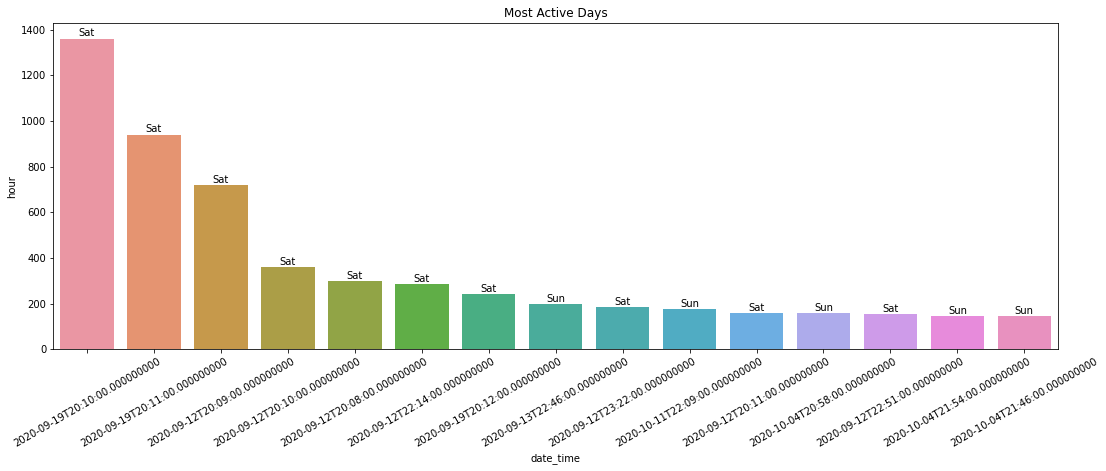

In [75]:
#most active days
plt.figure(figsize = (18, 6))

grouped_by_date = df.groupby('date_time').sum().reset_index().sort_values(by = 'hour', ascending = False).head(15)
grouped_by_date['day_sent'] = grouped_by_date['date_time'].apply(lambda x: x.strftime('%a'))
ax = sns.barplot(y = 'hour', x = 'date_time', data = grouped_by_date)

# I spent way too long to get the bar annotations to work properly. Thank you again, StackOverflow.
for bar, label in zip(ax.patches, grouped_by_date['day_sent']):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.text(x + width/2., height + 10, label, ha="center") 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.title('Most Active Days')

#plt.savefig('most_active_days.svg', format = 'svg')
#files.download('most_active_days.svg')

Text(0.5, 1.0, 'Most Active Hours')

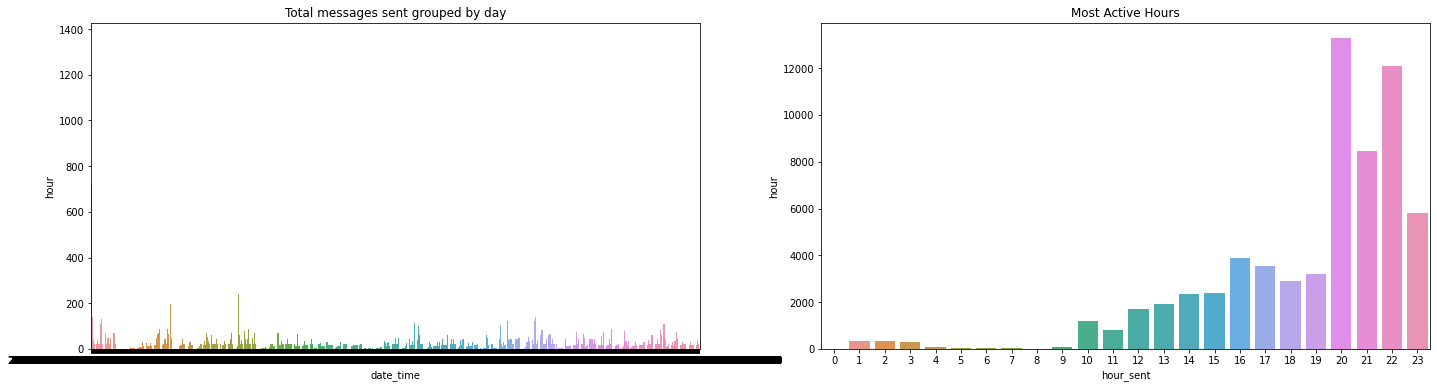

In [76]:
fig, axs = plt.subplots(ncols = 2, figsize = (24, 6))

grouped_by_day = df.groupby('date_time').sum().reset_index()[['date_time', 'hour']]
sns.barplot(y = 'hour', x = 'date_time', data = grouped_by_day, ax = axs[0])
axs[0].set_title('Total messages sent grouped by day')

df['hour_sent'] = df['date_time'].apply(lambda x: x.hour)
grouped_by_time = df.groupby('hour_sent').sum().reset_index().sort_values(by = 'hour', ascending = False)
sns.barplot(y = 'hour', x = 'hour_sent', data = grouped_by_time, ax = axs[1])
axs[1].set_title('Most Active Hours')

In [77]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nasiksami/whatsapp-chat-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/nasiksami/whatsapp-chat-analysis


'https://jovian.ml/nasiksami/whatsapp-chat-analysis'